In [1]:
import pandas as pd
import os

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
traffic_df = pd.read_csv(os.path.join('/content/drive/My Drive/Explainable ML/Metro_Interstate_Traffic_Volume.csv'))

In [4]:
print("traffic_df.head()\n",traffic_df.head())

traffic_df.head()
   holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  


In [5]:
traffic_df.values[:3]

array([['None', 288.28, 0.0, 0.0, 40, 'Clouds', 'scattered clouds',
        '2012-10-02 09:00:00', 5545],
       ['None', 289.36, 0.0, 0.0, 75, 'Clouds', 'broken clouds',
        '2012-10-02 10:00:00', 4516],
       ['None', 289.58, 0.0, 0.0, 90, 'Clouds', 'overcast clouds',
        '2012-10-02 11:00:00', 4767]], dtype=object)

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

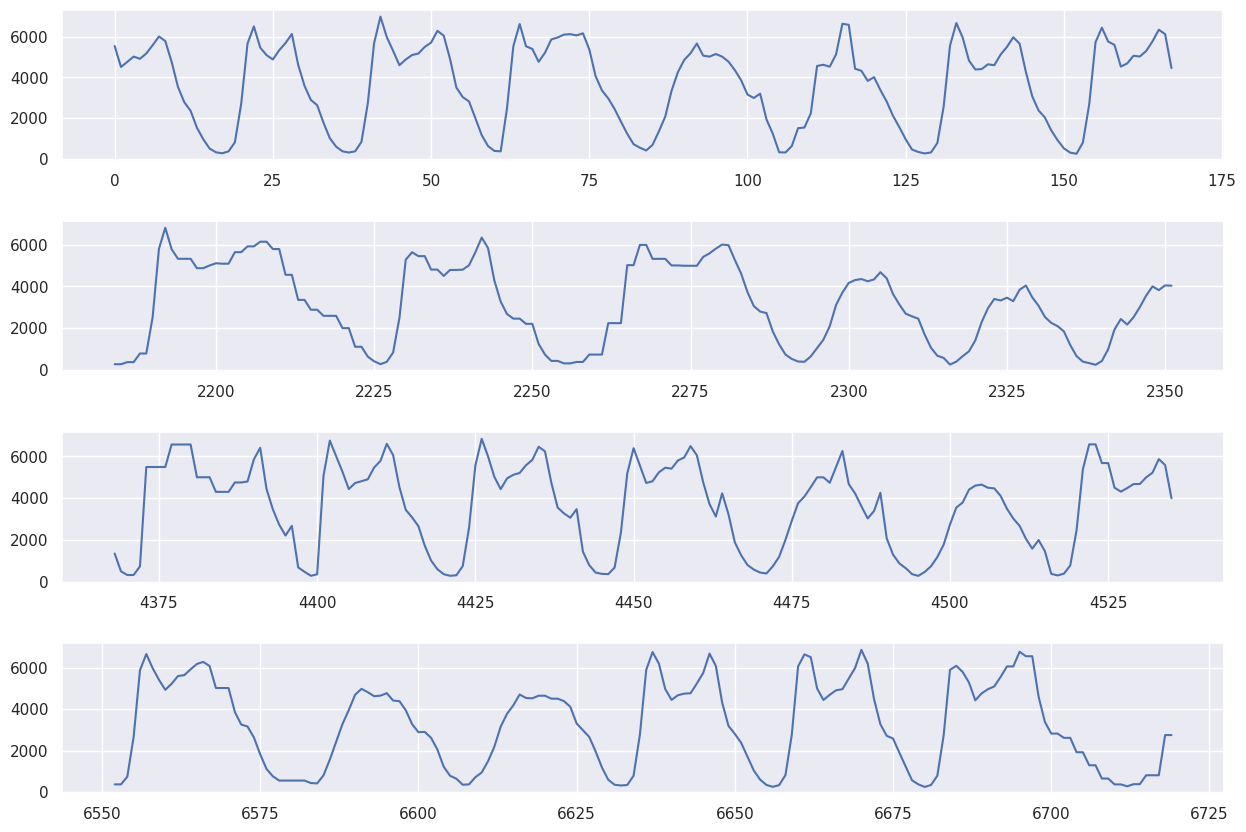

In [7]:
sns.set()
fig, (ax0,ax1,ax2,ax3) = plt.subplots(4,1, figsize=(15,8))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.4)
traffic_df[:168].traffic_volume.plot(ax=ax0)
traffic_df[(168*13):(168*14)].traffic_volume.plot(ax=ax1)
traffic_df[(168*26):(168*27)].traffic_volume.plot(ax=ax2)
traffic_df[(168*39):(168*40)].traffic_volume.plot(ax=ax3)
plt.show()

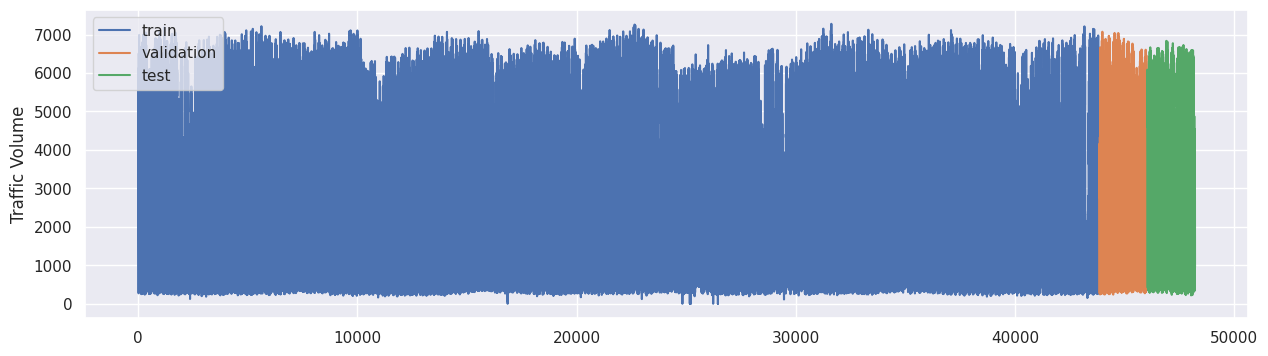

In [8]:
train = traffic_df[:-4368]
valid = traffic_df[-4368:-2184]
test = traffic_df[-2184:]
plt.figure(figsize=(15,4))
plt.plot(train.index.values, train.traffic_volume.values,\
label='train')
plt.plot(valid.index.values, valid.traffic_volume.values,\
label='validation')
plt.plot(test.index.values, test.traffic_volume.values,\
label='test')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()

In [9]:
print("traffic_df.values[:3]\n",traffic_df.values[:3])

traffic_df.values[:3]
 [['None' 288.28 0.0 0.0 40 'Clouds' 'scattered clouds'
  '2012-10-02 09:00:00' 5545]
 ['None' 289.36 0.0 0.0 75 'Clouds' 'broken clouds' '2012-10-02 10:00:00'
  4516]
 ['None' 289.58 0.0 0.0 90 'Clouds' 'overcast clouds'
  '2012-10-02 11:00:00' 4767]]


In [10]:
# Data PreparationWhy?
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
ohe.fit(traffic_df)
print('categories: {}'.format(ohe.categories_))
X_ohe = ohe.transform(traffic_df)
print('Weather encoded: {}'.format(X_ohe[:5]))
traffic_df = traffic_df.drop(['weather_description','weather_main'],
axis=1)

categories: [array(['Christmas Day', 'Columbus Day', 'Independence Day', 'Labor Day',
       'Martin Luther King Jr Day', 'Memorial Day', 'New Years Day',
       'None', 'State Fair', 'Thanksgiving Day', 'Veterans Day',
       'Washingtons Birthday'], dtype=object), array([  0.  , 243.39, 243.62, ..., 309.08, 309.29, 310.07]), array([0.0000e+00, 2.5000e-01, 2.6000e-01, 2.7000e-01, 2.8000e-01,
       2.9000e-01, 3.0000e-01, 3.1000e-01, 3.2000e-01, 3.3000e-01,
       3.4000e-01, 3.5000e-01, 3.6000e-01, 3.7000e-01, 3.8000e-01,
       4.0000e-01, 4.1000e-01, 4.2000e-01, 4.3000e-01, 4.4000e-01,
       4.5000e-01, 4.6000e-01, 4.7000e-01, 4.8000e-01, 5.0000e-01,
       5.1000e-01, 5.2000e-01, 5.3000e-01, 5.4000e-01, 5.5000e-01,
       5.6000e-01, 5.7000e-01, 5.8000e-01, 5.9000e-01, 6.0000e-01,
       6.1000e-01, 6.2000e-01, 6.3000e-01, 6.4000e-01, 6.5000e-01,
       6.6000e-01, 6.7000e-01, 6.8000e-01, 6.9000e-01, 7.0000e-01,
       7.1000e-01, 7.2000e-01, 7.3000e-01, 7.4000e-01, 7.6000e-01,
 

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Weather encoded: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [12]:
# Display data types of each column
print("Data types of each column:")
print(traffic_df.dtypes)


Data types of each column:
holiday            object
temp              float64
rain_1h           float64
snow_1h           float64
clouds_all          int64
date_time          object
traffic_volume      int64
dtype: object


In [13]:
# Normalization
# Extract numeric columns for normalization
numeric_cols = ['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume']

# Normalize 'traffic_volume' separately
y_scaler = MinMaxScaler()
y_scaler.fit(traffic_df[['traffic_volume']])
y_train = y_scaler.transform(train[['traffic_volume']])
y_test = y_scaler.transform(test[['traffic_volume']])

# Normalize other numeric columns
X_scaler = MinMaxScaler()
X_scaler.fit(traffic_df[numeric_cols])
X_train = X_scaler.transform(train[numeric_cols])
X_test = X_scaler.transform(test[numeric_cols])

In [14]:
def data_generator(X, y, window=144, horizon=168, batch_size=1, epochs=10):
    for epoch in range(epochs):
        X_temp = []
        y_temp = []
        batch_counter = 0
        # last x value
        last_val = len(X) - (window + horizon)
        index_range = list(range(last_val))

        for idx in index_range:
            X_idx = X[idx:idx+window]
            # y: prediction horizon hours later
            y_idx = y[idx+window+horizon]
            X_temp.append(X_idx)
            y_temp.append(y_idx)
            batch_counter += 1

            if batch_counter == batch_size or index_range[-1] == idx:
                yield np.array(X_temp), np.array(y_temp).reshape(-1)
                X_temp = []
                y_temp = []
                batch_counter = 0

test_gen = data_generator(X_train, y_train)
x_, y_ = next(test_gen)
print('x_', x_)
print('y_', y_)
print(x_.shape, y_.shape)


x_ [[[0.92972555 0.         0.         0.4        0.76167582]
  [0.93320863 0.         0.         0.75       0.62032967]
  [0.93391815 0.         0.         0.9        0.65480769]
  [0.93569194 0.         0.         0.9        0.69038462]
  [0.93894927 0.         0.         0.75       0.67554945]
  [0.94081981 0.         0.         0.01       0.71167582]
  [0.94549618 0.         0.         0.01       0.76703297]
  [0.94772148 0.         0.         0.01       0.82623626]
  [0.9486245  0.         0.         0.2        0.79546703]
  [0.94527042 0.         0.         0.2        0.65521978]
  [0.93840101 0.         0.         0.2        0.48612637]
  [0.93327313 0.         0.         0.01       0.38241758]
  [0.93078982 0.         0.         0.01       0.32431319]
  [0.92611346 0.         0.         0.01       0.21002747]
  [0.92059857 0.         0.         0.01       0.13228022]
  [0.91795401 0.         0.         0.01       0.06950549]
  [0.91421292 0.         0.         0.01       0.0440

In [15]:
test_gen = data_generator(X_train, y_train)
x_, y_ = next(test_gen)
print('x_',x_)
print('y_',y_)
print(x_.shape, y_.shape)

x_ [[[0.92972555 0.         0.         0.4        0.76167582]
  [0.93320863 0.         0.         0.75       0.62032967]
  [0.93391815 0.         0.         0.9        0.65480769]
  [0.93569194 0.         0.         0.9        0.69038462]
  [0.93894927 0.         0.         0.75       0.67554945]
  [0.94081981 0.         0.         0.01       0.71167582]
  [0.94549618 0.         0.         0.01       0.76703297]
  [0.94772148 0.         0.         0.01       0.82623626]
  [0.9486245  0.         0.         0.2        0.79546703]
  [0.94527042 0.         0.         0.2        0.65521978]
  [0.93840101 0.         0.         0.2        0.48612637]
  [0.93327313 0.         0.         0.01       0.38241758]
  [0.93078982 0.         0.         0.01       0.32431319]
  [0.92611346 0.         0.         0.01       0.21002747]
  [0.92059857 0.         0.         0.01       0.13228022]
  [0.91795401 0.         0.         0.01       0.06950549]
  [0.91421292 0.         0.         0.01       0.0440

In [16]:
from keras.models import Sequential
from keras.layers import Conv1D, Dropout, Bidirectional, LSTM, Dense
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, ModelCheckpoint
window = 24  # Replace 24 with your desired value
n_input = window
n_features = X_train.shape[1]
reg = l2(0.0001)
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=6, input_shape=(n_input, n_features), activation='relu'))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(units=32, dropout=0.3, kernel_regularizer=reg)))
model.add(Dense(units=1, kernel_regularizer=reg))

# Compile the model
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

# Set up early stopping and model checkpoint
early = EarlyStopping(monitor='val_loss', patience=1)
check = ModelCheckpoint(filepath='lstm_traffic_168_mdl.h5', monitor='val_loss', save_best_only=True)

In [17]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# Assuming X_train and y_train are your input features and target variable
n_input = 24  # Adjust as per your requirement
batch_size = 32  # Adjust as per your requirement

# Create the TimeseriesGenerator for training data
gen_train = TimeseriesGenerator(X_train, y_train, length=n_input, batch_size=batch_size)

# Similarly, create the TimeseriesGenerator for validation data (gen_test)
gen_test = TimeseriesGenerator(X_test, y_test, length=n_input, batch_size=batch_size)
epochs = 10
# Now you can use gen_train and gen_test in your model.fit
history = model.fit(gen_train, epochs=epochs, steps_per_epoch=len(gen_train),
                    validation_data=gen_test, validation_steps=len(gen_test),
                    callbacks=[early, check])

# Save the trained model
model.save('lstm_traffic_168_mdl.h5')


Epoch 1/10
1370/1370 [==============================] - 21s 9ms/step - loss: 0.0345 - mae: 0.1300 - val_loss: 0.0127 - val_mae: 0.0761
Epoch 2/10
  16/1370 [..............................] - ETA: 9s - loss: 0.0185 - mae: 0.0973

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1370/1370 [==============================] - 11s 8ms/step - loss: 0.0168 - mae: 0.0897 - val_loss: 0.0080 - val_mae: 0.0580
Epoch 3/10
1370/1370 [==============================] - 19s 14ms/step - loss: 0.0132 - mae: 0.0789 - val_loss: 0.0075 - val_mae: 0.0596
Epoch 4/10
1370/1370 [==============================] - 14s 10ms/step - loss: 0.0115 - mae: 0.0739 - val_loss: 0.0062 - val_mae: 0.0514
Epoch 5/10
1370/1370 [==============================] - 11s 8ms/step - loss: 0.0107 - mae: 0.0713 - val_loss: 0.0058 - val_mae: 0.0514
Epoch 6/10
1370/1370 [==============================] - 11s 8ms/step - loss: 0.0100 - mae: 0.0688 - val_loss: 0.0063 - val_mae: 0.0571


In [18]:
def predictions_vs_true(X_test, y_true, model, scaler, window=144, horizon=24):
    X_temp = []
    y_temp = []
    y_temp_simple = []
    num_pred = len(X_test) - (window + horizon)
    for idx in range(num_pred):
        X_idx = X_test[idx:idx + window]
        y_idx = y_true[idx + window + horizon]
        X_temp.append(X_idx)
        y_temp.append(y_idx)
        # simple predictor: value from the day before (24 hours) before
        y_temp_simple.append(y_true[idx + window])

    X_temp = np.array(X_temp)
    y_pred = model.predict(X_temp)
    y_pred = scaler.inverse_transform(y_pred)
    y_temp = scaler.inverse_transform(y_temp)
    y_temp_simple = scaler.inverse_transform(y_temp_simple)

    return y_temp, y_pred, y_temp_simple


In [19]:
from sklearn.metrics import mean_absolute_error

In [20]:
horizon = 24
y_true, y_pred, y_temp_simple = predictions_vs_true(X_test,y_test,model=model,scaler=y_scaler,window=window,horizon=horizon)
print('mae, simple pred', mean_absolute_error(y_true, y_temp_simple))

67/67 [==============================] - 1s 3ms/step
mae, simple pred 1691.0402621722847


In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
evaluate_df = pd.DataFrame()
evaluate_df['actual_traffic'] = y_true.flatten()
evaluate_df['predicted_traffic'] = y_temp_simple.flatten()
actual_under_nc_thresh = np.where(evaluate_df['actual_traffic'] <\
1500, 1, 0)
pred_under_nc_thresh = np.where(evaluate_df['predicted_traffic'] <\
1500, 1, 0)
confusion_matrix3 = confusion_matrix(actual_under_nc_thresh, pred_under_nc_thresh)
print("confusion_matrix\n",confusion_matrix3)

confusion_matrix
 [[1262  311]
 [ 313  250]]


In [ ]:
pip install interpret

In [35]:
from interpret.glassbox import ExplainableBoostingRegressor
from interpret import show

# Assuming you have X_train and y_train prepared
ebm_model = ExplainableBoostingRegressor()
ebm_model.fit(X_train, y_train)

# Show global feature importance
ebm_model_global_explanation = ebm_model.explain_global()
show(ebm_model_global_explanation)

# Visualize feature importance
feature_importance = ebm_model.get_feature_importance()
keys = list(feature_importance.keys())
values = list(feature_importance.values())
data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by="score", ascending=False)
data.plot(kind='barh', figsize=(10, 6))
plt.title("Feature Importance using EBM")
plt.show()


AttributeError: 'ExplainableBoostingRegressor' object has no attribute 'get_feature_importance'

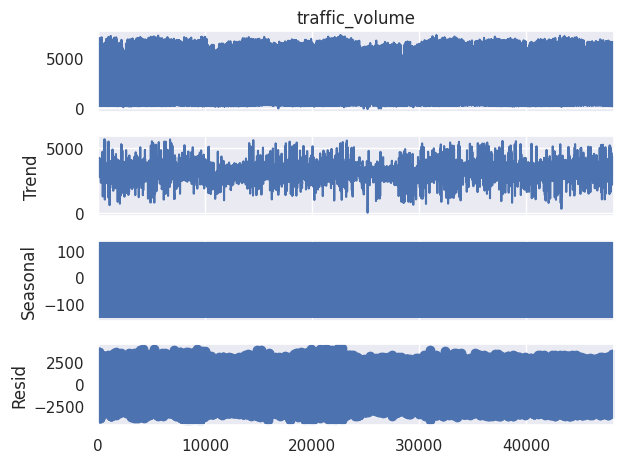

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'traffic_df' is your dataframe with datetime index and 'traffic_volume' column
result = seasonal_decompose(x=traffic_df['traffic_volume'], period=24, model='additive')
result.plot()
plt.show()


In [26]:
from sklearn import tree

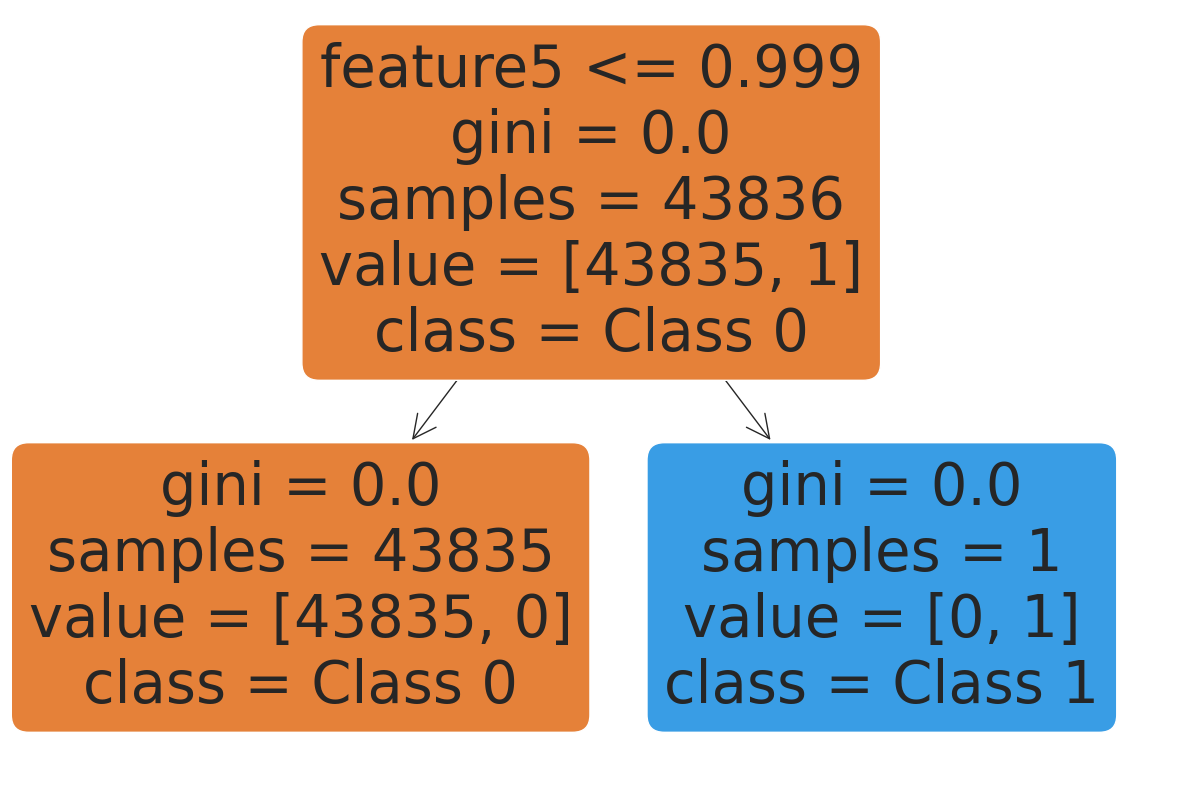

In [33]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt

# Assuming X_train is a NumPy array with shape (43836, 5)
# Assuming feature_names is a list of column names for your features
feature_names = ['feature1', 'feature2', 'feature3', 'feature4', 'feature5']

# Convert X_train to a Pandas DataFrame with column names
X_train_df = pd.DataFrame(X_train, columns=feature_names)

# Assuming fitted_dt_surrogate is your trained decision tree classifier
# y_train is the corresponding labels
fitted_dt_surrogate = tree.DecisionTreeClassifier(max_depth=8)  # Set max_depth to 8
fitted_dt_surrogate.fit(X_train_df, y_train.astype(int))  # Convert labels to integers

# Plot the decision tree with a specified max_depth
plt.figure(figsize=(15, 10))
tree.plot_tree(fitted_dt_surrogate,
               feature_names=feature_names,
               class_names=['Class 0', 'Class 1'],
               filled=True,
               rounded=True,
               max_depth=8)  # Set max_depth for the plot
plt.show()
